<a href="https://colab.research.google.com/github/menahaha/housepricepred/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [ ]:
dataset.shape

(2919, 13)

In [ ]:
int_ = (dataset.dtypes == 'int')
int_cols = list(int_[int_].index)
print("integer variables: ", len(int_cols))
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("object variables :",len(object_cols))
float_ = (dataset.dtypes == 'float')
float_cols = list(float_[float_].index)
print("float variables :",len(float_cols))

integer variables:  6
object variables : 4
float variables : 3


eda

In [ ]:
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


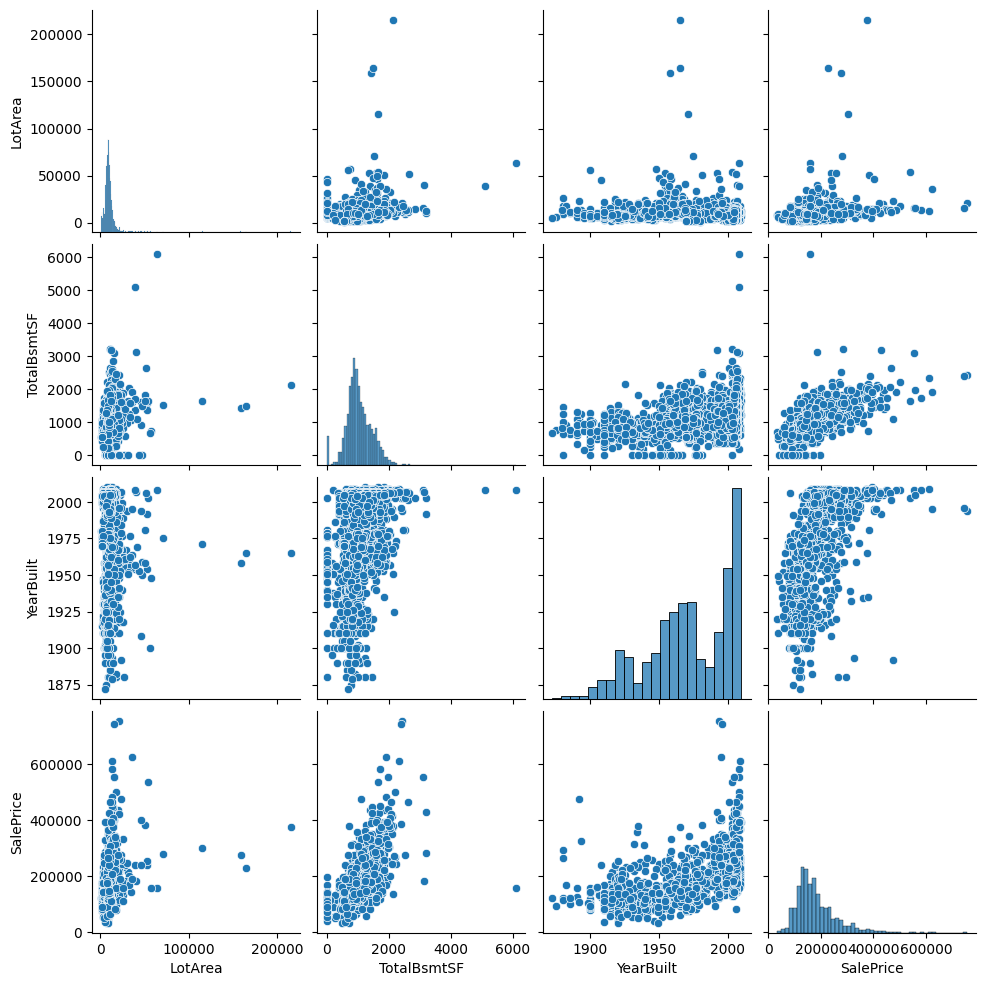

In [ ]:
sns.pairplot(dataset[['LotArea', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']])
plt.show()


<Axes: >

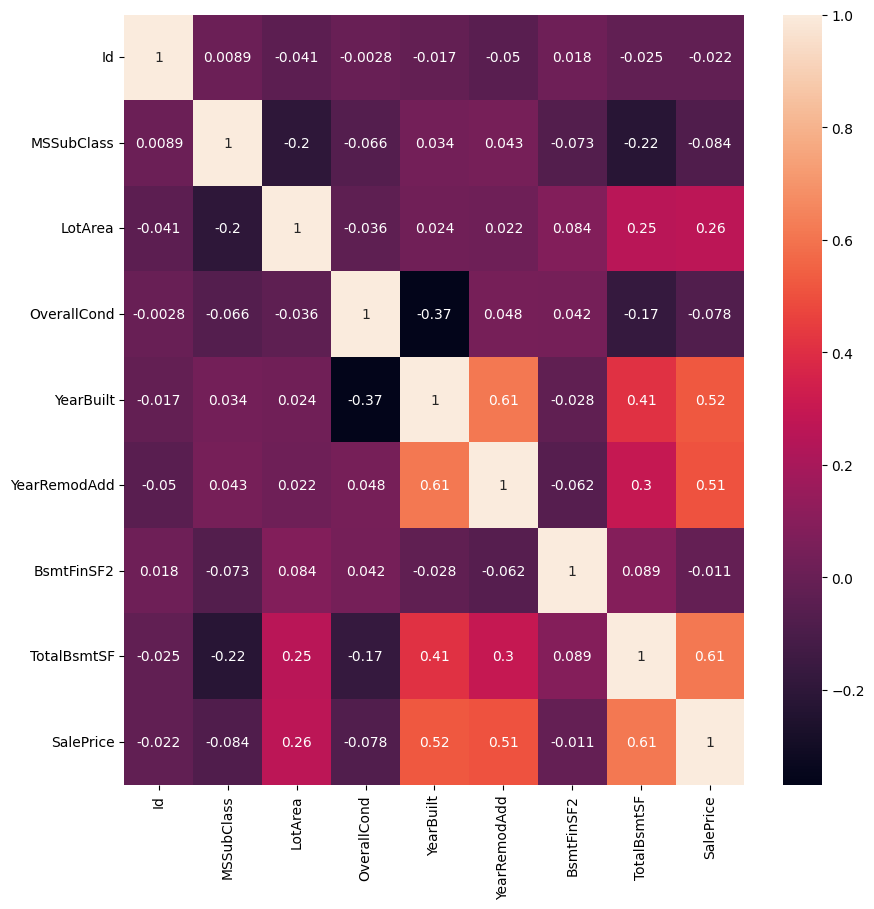

In [ ]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_dataset.corr(), annot=True,)

<Axes: >

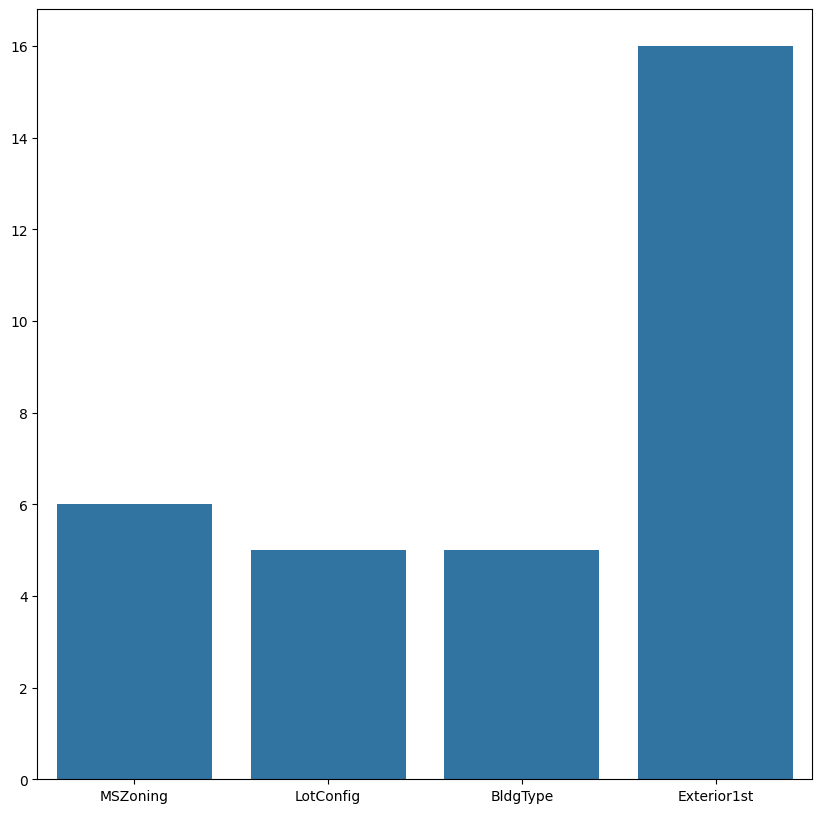

In [ ]:
unique_values = []
for col in object_cols:
   unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10, 10))
sns.barplot(x=object_cols,y=unique_values)

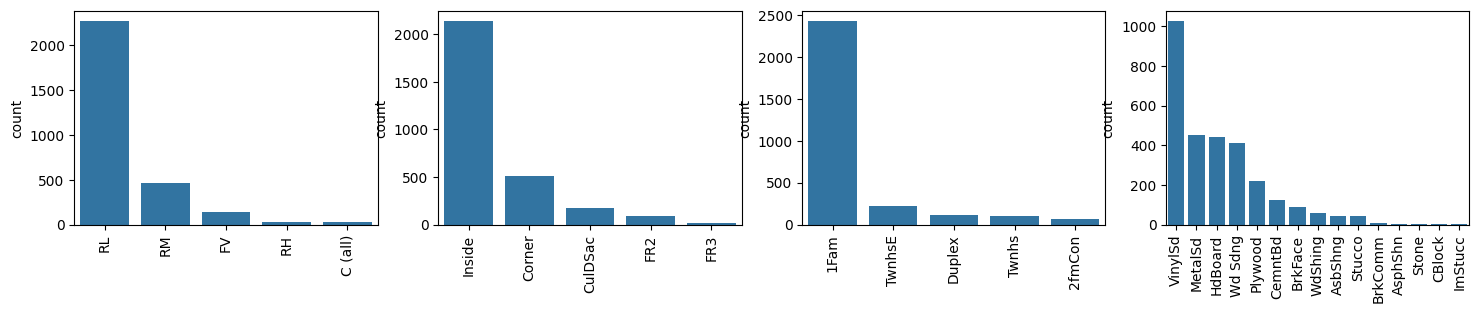

In [ ]:
plt.figure(figsize=(18, 36))
index = 1
for col in object_cols:
   y = dataset[col].value_counts()
   plt.subplot(11, 4, index)
   sns.barplot(x=list(y.index), y=y)
   plt.xticks(rotation=90)
   index += 1

data cleaning

In [ ]:
dataset.drop(['Id'], axis = 1, inplace = True)


In [ ]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [ ]:
new_dataset = dataset.dropna()

In [ ]:
new_dataset.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


In [ ]:
X = new_dataset.drop('SalePrice', axis=1)
Y = new_dataset['SalePrice']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
print(X.dtypes[X.dtypes == 'object'])


Series([], dtype: object)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X,Y, train_size=0.8, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

LinearRegression()

error analysis

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
Y_pred = model_LR.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred)
print("Mean Squared Error:", mse)
rmse  = np.sqrt(mean_squared_error(Y_valid, Y_pred))
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1692381012.102706
Root Mean Squared Error: 41138.558702301496
